In [2]:
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import plotly as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from scaling import standardize, normalize
import matplotlib.pyplot as plt
import pandas as pd
import collections, numpy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
df2015 = pd.read_csv('../data/kaasa/kaasa_2015.csv', index_col=None, header=0)
df2016 = pd.read_csv('../data/kaasa/kaasa_2016.csv', index_col=None, header=0)
df2017 = pd.read_csv('../data/kaasa/kaasa_2017.csv', index_col=None, header=0)
df2018 = pd.read_csv('../data/kaasa/kaasa_2018.csv', index_col=None, header=0)
df2019 = pd.read_csv('../data/kaasa/kaasa_2019.csv', index_col=None, header=0)
df2020 = pd.read_csv('../data/kaasa/kaasa_2020.csv', index_col=None, header=0)
df2021 = pd.read_csv('../data/kaasa/kaasa_2021.csv', index_col=None, header=0)

files = [df2015, df2016, df2017, df2018,df2019, df2020, df2021]

df = pd.concat(files, axis=0, ignore_index=True)

df['date_time'] = pd.to_datetime(df['date_time'])

In [4]:
df = standardize(df, ['velocity', 'altitude', 'latitude', 'longitude', 'temperature',  'date_time', 'sin_time', 'cos_time']) # standarize the data
df = normalize(df, ['velocity', 'altitude', 'latitude', 'longitude', 'temperature', 'date_time', 'sin_time', 'cos_time'], -1, 1) # normalize the data
sheep_data = df.loc[:,['velocity', 'altitude', 'latitude', 'longitude', 'temperature', 'individual', 'sin_time', 'cos_time', 'attack']]



# create a list of unique individuals in the dataset
individuals = sheep_data['individual'].unique()

# split the individuals into training and test sets
train_individuals, test_individuals = train_test_split(individuals, test_size=0.2, random_state=42)

# split the dataframe into training and test sets based on the individual column and remove individual after
train_df = sheep_data[sheep_data['individual'].isin(train_individuals)].drop('individual', axis=1)
test_df = sheep_data[sheep_data['individual'].isin(test_individuals)].drop('individual', axis=1)
sheep_data = sheep_data.drop('individual', axis=1)



#Create training and test sets
X_train = train_df.drop('attack', axis=1)
y_train = train_df['attack']
X_test = test_df.drop('attack', axis=1)
y_test = test_df['attack']

print(X_test.columns)
print(X_test.columns)

'''
X_train, X_test, y_train, y_test = train_test_split(sheep_data.drop(['attack'], axis=1),
                                                    sheep_data['attack'],
                                                    test_size=0.2,
                                                    random_state=42)
'''

Index(['velocity', 'altitude', 'latitude', 'longitude', 'temperature',
       'sin_time', 'cos_time'],
      dtype='object')
Index(['velocity', 'altitude', 'latitude', 'longitude', 'temperature',
       'sin_time', 'cos_time'],
      dtype='object')


"\nX_train, X_test, y_train, y_test = train_test_split(sheep_data.drop(['attack'], axis=1),\n                                                    sheep_data['attack'],\n                                                    test_size=0.2,\n                                                    random_state=42)\n"

Predictet values: Counter({0: 44811, 1: 652})
Test values: Counter({0: 44919, 1: 544})
Accuracy of decision tree: 98.38%
velocity : 0.08562048564663689
altitude : 0.12064671517062323
latitude : 0.1492901733301543
longitude : 0.1260469222595683
temperature : 0.22399084005631015
sin_time : 0.14824994314532977
cos_time : 0.14615492039137729
Confusion matrix:
 [[44496   423]
 [  315   229]]


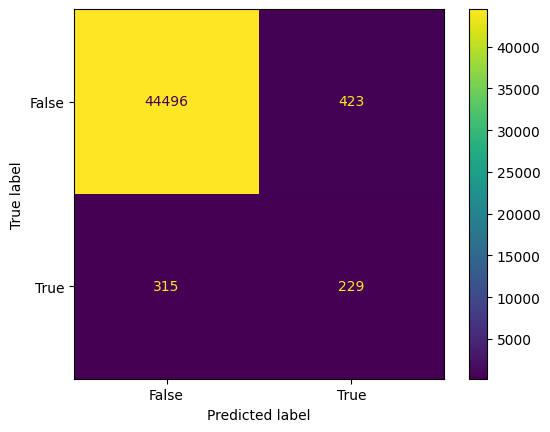

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     44919
           1       0.35      0.42      0.38       544

    accuracy                           0.98     45463
   macro avg       0.67      0.71      0.69     45463
weighted avg       0.99      0.98      0.98     45463



In [6]:
# Train a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=30)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# 
counter = collections.Counter(y_pred)
print('Predictet values:', counter)
counter1 = collections.Counter(y_test)
print('Test values:',counter1)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of decision tree: {:.2f}%".format(accuracy * 100))


# Get the feature importances
importances = dt_model.feature_importances_

# Print the feature importances
for i, feature in enumerate(X_train.columns):
    print(feature, ':', importances[i])

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
# Compute classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)